# Explorative Data Analysis & ML prediction models on Toy Dataset

### Needed libraries and loading data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("toy_dataset.csv")
df.head(5)

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


## Explorative Data Analysis

One of goals of the Explorative Data Analysis (EDA for short) is to clean and reduce the given dataset so we could produce a better ML prediction model.

Steps of cleaning data:

1.   Removing rows that contain missing/null values.
2.   Removing identical rows.
3.   Removing non-important columns (space reduction #1).
4.   Removing attributes (columns) that are highly correlated between eachother.
5.   Removing outliers.

## Getting known with the dataset

Before cleaning the dataset, we should get familiar with it. Explore the basic things like the size of the dataset, types of data, mean/median/standard deviation for each attribute etc.

In [ ]:
# Shape of the dataset
df.shape

(150000, 6)

In [ ]:
# Types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [ ]:
# Summary of statistical characteristics
df.describe()
# Note: column "Number" is not important and can be removed

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


In [ ]:
# Number of healthy people and sick people
df.Illness.value_counts()

No     137861
Yes     12139
Name: Illness, dtype: int64

## Cleaning the table

In [ ]:
# Check for missing and null values
print(df.isnull().sum())

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64


In [4]:
# Check for identical rows
duplicate_rows_df = df[df.duplicated()]
print("Number of identical rows:", duplicate_rows_df.shape)

Number of identical rows: (0, 6)


In [5]:
# Remove the column "Number"
df = df.drop("Number", axis=1)
df.head(5)

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


## Getting familiar with the dataset through plots.

### Check the distribution of each attributes compared to dependent variable `Illness`.

Let's begin with the simple histogram that shows frequencies of healthy and sick people so we could see the ratio of those two classes.

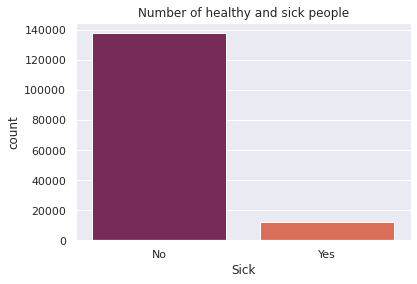

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.countplot(x="Illness", palette="rocket", data=df)
plt.xlabel('Sick')
plt.title("Number of healthy and sick people")
plt.show()

Check if the attribute `gender` has effect on illness of a person.

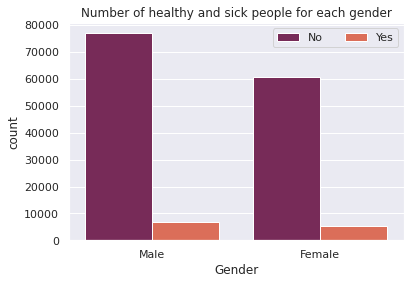

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.countplot(x="Gender",hue='Illness', palette="rocket", data=df)
plt.xlabel('Gender')
plt.title("Number of healthy and sick people for each gender")
plt.legend(loc='best',ncol=2)
plt.show()

***Conclusion***
The ratio of healthy and sick people seems to be equal for each gender, so the attribute `gender` does not have big impact on `illness`.

Check if `city` has an impact on illness of people.

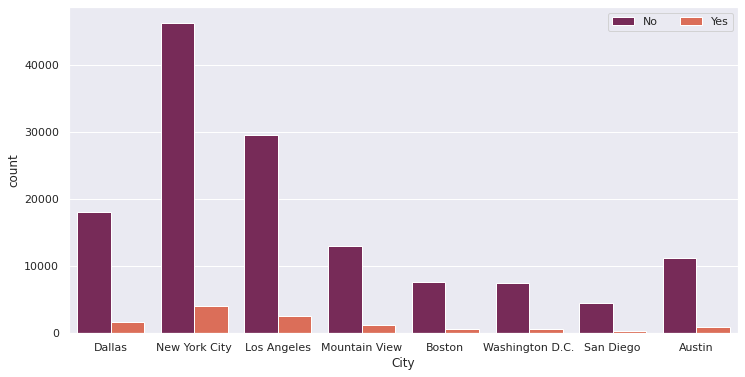

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
sns.countplot(x="City",hue='Illness', palette="rocket", data=df)
plt.legend(loc='best',ncol=2)
plt.show()

***Conclusion***
Same as before, attribute `City` does not have significant impact on `Illness`.

We could've logically conclude that attributes such as `Gender` and `City` won't have significant impact on `illness`. Attributes such as `Age` and `Income` should have more impact. Let's check the frequency plots for both of them.

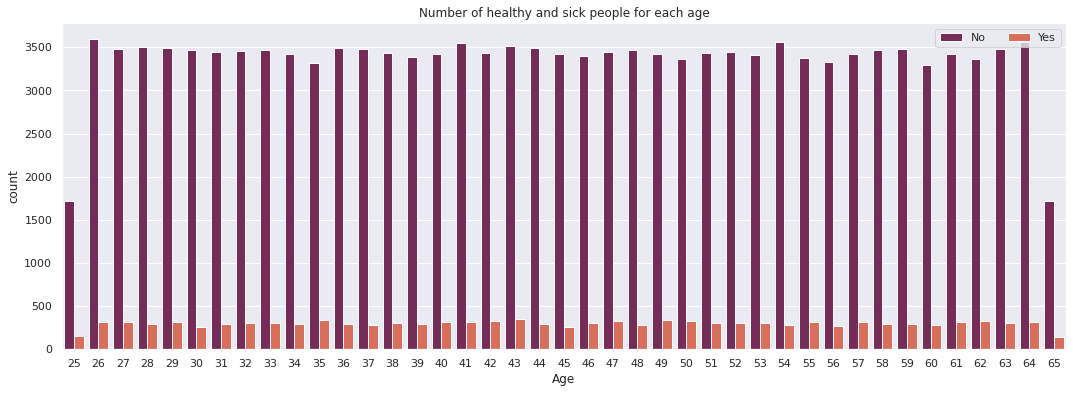

In [8]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
sns.countplot(x="Age",hue='Illness', palette="rocket", data=df)
plt.xlabel('Age')
plt.title("Number of healthy and sick people for each age")
plt.legend(loc='best',ncol=2)
plt.show()

***Conclusion***

Somehow unexpected, attribute `Age` seem to not have any significant impact on `Illness`, since the ratio between healthy and sick people remains the same for all the different ages.

Check the distribution for `Income` for healthy and sick people.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


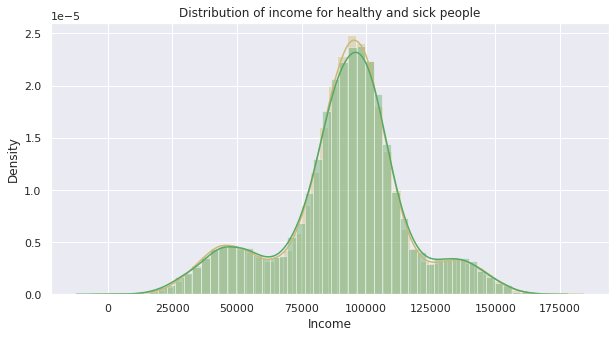

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(df[df["Illness"] == "No"]["Income"], color="y")
sns.distplot(df[df["Illness"] == "Yes"]["Income"], color="g")
fig.legend(labels=['No', 'Yes'])
plt.title("Distribution of income for healthy and sick people")
plt.show()

***Conclusion***

Graphs are overlapping each other, so another unexpected conclusion is that `Income` does not seem to have any significant impact on `Illness`.

In [ ]:
df.head(5)

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


## Check for the outliers

If we want to get the best ML prediction model possible, we should remove outliers from the dataset. We can check if they exist by graphing a box plot.

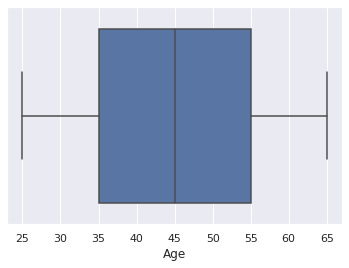

In [10]:
sns.boxplot(x=df['Age'])

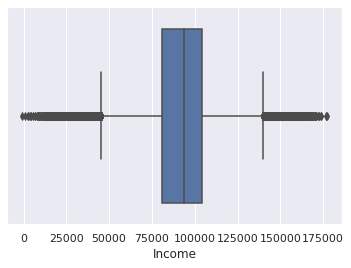

In [11]:
sns.boxplot(x=df['Income'])

There are outliers in `Income` category. There are even some non-sense income values such as negativne incomes. We can remove those by applying the IQR score technique.

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age          20.00
Income    23651.25
dtype: float64


In [13]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(135217, 5)

As we can see, we cleaned the dataset by removing something around 15 000 outliers. It's possible for the dataset to contain some more outliers, but the number of those is not significant comparing to the number of outliers we've just removed.

Let's check the box plot for the `Income` once more.

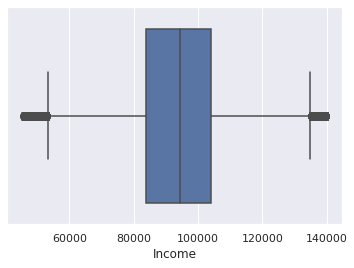

In [14]:
sns.boxplot(x=df['Income'])

As we can see, we've removed the majority of the outliers.

## Processing data (one-hot encoding)

Before calculating the correlation matrix, we need to numerate all of the data. There are some categorical data that needs to be one-hot encoded, such as `Gender` and `City`.

### One-hot encoding

In [15]:
df.head()

,City,Gender,Age,Income,Illness
2,Dallas,Male,42,52483.0,No
4,Dallas,Male,46,50289.0,No
5,Dallas,Female,36,50786.0,No
8,Dallas,Male,51,68667.0,No
9,Dallas,Female,30,50082.0,No


In [16]:
data_one_hot = pd.get_dummies(df)
data_one_hot.head()

,Age,Income,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Female,Gender_Male,Illness_No,Illness_Yes
2,42,52483.0,0,0,1,0,0,0,0,0,0,1,1,0
4,46,50289.0,0,0,1,0,0,0,0,0,0,1,1,0
5,36,50786.0,0,0,1,0,0,0,0,0,1,0,1,0
8,51,68667.0,0,0,1,0,0,0,0,0,0,1,1,0
9,30,50082.0,0,0,1,0,0,0,0,0,1,0,1,0


### Correlation between independent variables (attributes)

Check if there is a significant correlation between attributes. The most practical way to do this is to use function `corr()` that produces correlation matrix. We can visualize this matrix using `heatmap` function.

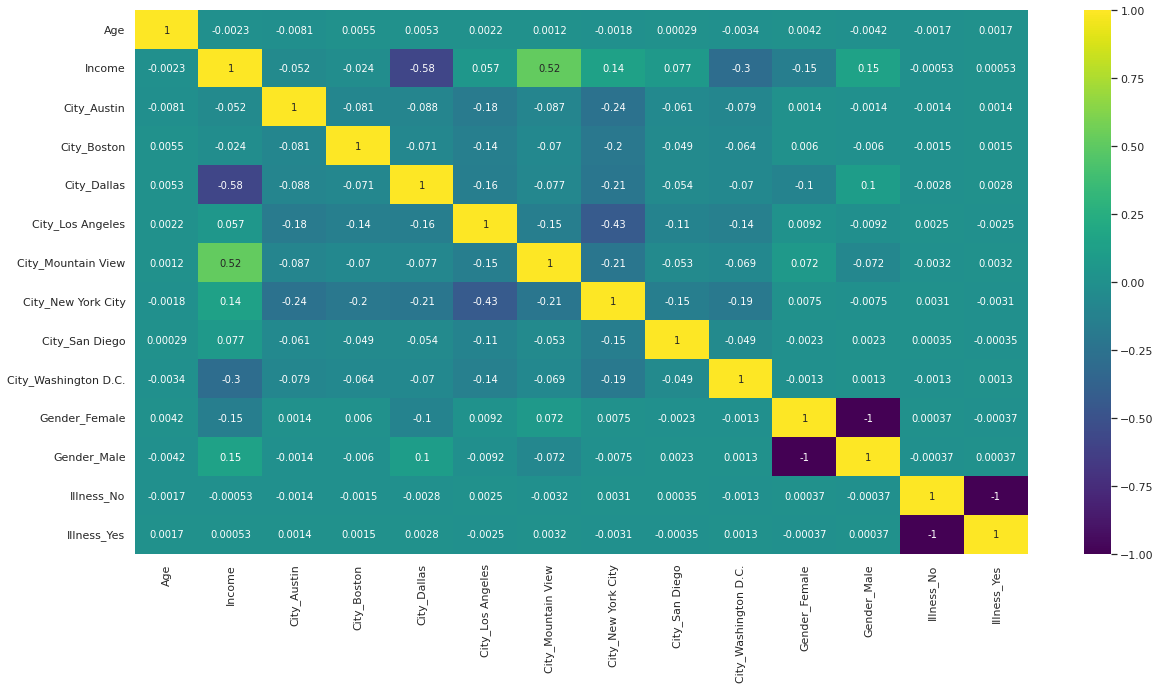

In [17]:
plt.figure(figsize=(20,10))
c = data_one_hot.corr()
sns.heatmap(c, annot=True, cmap='viridis')

We don't need to pay attention to the correlations between the same datatype (such as correlations between different cities), since such matrix is a product of one-hot encoding of the data.

The only somewhat significant correlations are positive correlation between the city `Mountain View` and `Income`, and positive correlation between the city `Dallas` and `Income`. Since these are not that high, it is not neccessary to remove them from the dataset.

The most important result from the correlation matrix is the fact that the dependent variable `Illness` is not correlated to either of the attributes (almost all of the correlations are equal to zero), meaning neither of the attributes have significant impact on whether the person is sick or not. We've made the same conclusion once we've plotted histograms earlier.

***Conclusion***

Neither of the attributes are significant in `Illness` prediction. However, the correlation matrix only shows how each of those attributes  seperately correlates to the output, but not the combination of the attributes.

### The question remains: How do we make a good classification model when we do not have any correlations? There seems to be no linear connection between the independent variables to the dependent variable. We might spot some non-visible connection with ML models such as random forests and deep neural networks.

## Processing data no.2 (normalization, splitting the dataset into training and testing part)

We continue with the dataset df which is not one-hot encoded and normalized. We want to normalize the data since it has been shown that ML models such as neural networks perform better that way.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
df.head(5)

,City,Gender,Age,Income,Illness
2,Dallas,Male,42,52483.0,No
4,Dallas,Male,46,50289.0,No
5,Dallas,Female,36,50786.0,No
8,Dallas,Male,51,68667.0,No
9,Dallas,Female,30,50082.0,No


In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Column transformer for X

ct = make_column_transformer(
    (MinMaxScaler(), ["Age", "Income"]), # Normalization
    (OneHotEncoder(handle_unknown="ignore"), ["City", "Gender"]) # One-hot encoding
)

# X & y
X = df.drop("Illness", axis=1)
y = df["Illness"]

# Sets for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the column transformer to the training set
ct.fit(X_train)

# Transformation 
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [22]:
y_train = y_train.str.replace("No", "0")
y_train = y_train.str.replace("Yes", "1")

In [23]:
y_test = y_test.str.replace("No", "0")
y_test = y_test.str.replace("Yes", "1")

In [24]:
y_train = pd.to_numeric(y_train)
y_test = pd.to_numeric(y_test)

# Search for the best ML model

## Naive Bayes
Let's start with the Naive Bayes method. This method assumes that the input variables are independent between each other. Since the correlation matrix truly showed that there aren't any significant relationships between them, this method might perform good.

In [25]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(X_train_normal, y_train)
print("score on test: " + str(mnb.score(X_test_normal, y_test)))
print("score on train: "+ str(mnb.score(X_train_normal, y_train)))

score on test: 0.9182073657742937
score on train: 0.9191665202961922


Results on the training dataset and the testing dataset are almost indentical. The classification score is ~92%, but is that a good score as it seems?

Let's remind ourselves the ratio between healthy and sick people.


In [ ]:
df.Illness.value_counts()

No     124261
Yes     10956
Name: Illness, dtype: int64

In [ ]:
(124261)/(124261+10956)

0.9189746851357448

Check the ration in the training dataset.

In [ ]:
y_test.value_counts()

0    24832
1     2212
Name: Illness, dtype: int64

In [ ]:
(24832)/(24832+2212)

0.9182073657742937

So, the training dataset has something around 91.8% of healthy people. If we made an ML model that just outputs the value "0" (which stands for the score of a healthy person), we could get the accuracy of 91.8%. We can conclude that the Naive Bayes model is not a good prediction model. The question remains if the "accuracy" is the best metric for the success of the model.

Since we are classifying if the person is sick or not, we want a metric that will tell us how many positive cases (sick people) are properly indetified. Such metric is known as Recall.

The formula for Recall is: TP/(TP+FN), where TP stands for the number of correctly classified positive cases and FN stands for the number of wrongly classified negative cases (number of sick people that we classified as healthy).

If we want to immitate the model that only outputs the value "0" (classifies each person as healthy, no matter the input), it will have accuracy of 91.8%, but it will have recall equal to zero, which indicates that we have a bad prediction model.

Therefore, we should check both the accuracy and the recall for each of the future ML models we want to test.

In [26]:
y_pred = mnb.predict(X_test_normal)

In [27]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.000


Recall of Naive Bayes is equal to 0, therefore, it is not able to successfully clasify sick people.

## K nearest neighbours algorithm

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train_normal, y_train)
print("train shape: " + str(X_train_normal.shape))
print("score on test: " + str(knn.score(X_test_normal, y_test)))
print("score on train: "+ str(knn.score(X_train_normal, y_train)))

train shape: (108173, 12)
score on test: 0.9137331755657447
score on train: 0.9205254545958789


Accuracy: 91.37%.

Check for the recall score.

In [29]:
y_pred = knn.predict(X_test_normal)

In [30]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.009


Not a good score.

## Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_normal, y_train)
print("score on test: " + str(rf.score(X_test_normal, y_test)))
print("score on train: "+ str(rf.score(X_train_normal, y_train)))

score on test: 0.8652566188433664
score on train: 0.9990940438002089


In [32]:
y_pred = rf.predict(X_test_normal)

In [ ]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.063


Great score on training set, but the score on the testing set indicates overfitting.

Recall is 6.3%, at least it classifies some of the people as sick.

First try is rarely good, so we will tune the hyperparameters.

Let's check the current values of the hyperparameters.

In [ ]:
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


The most important parameters are the number of decision trees (`n_estimators`) and the number of attributes which are used for splitting in each leaf (`max_features`).

We will also try different values or the number of levels in each of the tree (`max_depth`), minimal number of data in the node before the split (`min_samples_split`), minimal number of data in the leaf (`min_samples_leaf`) and the bootstrapping method `bootstrap` (with or without the repetition).

Let's create the parameter grid. In each iteration, the algorithm will choose one of the possible combination of parameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [30,40]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 60, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [30, 40]}


In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_normal, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Check for the best parameters.

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 40}

In [ ]:
print("score on test: " + str(rf_random.score(X_test_normal, y_test)))
print("score on train: "+ str(rf_random.score(X_train_normal, y_train)))

score on test: 0.9182073657742937
score on train: 0.9191665202961922


In [ ]:
y_pred = rf_random.predict(X_test_normal)

In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.000


Better accuracy score than the random forest with default parameters, but recall is now zero.

Let's focus more on the results we've got so far. Let's remind ourselves that the model that produces the output "0" no matter what the input is, it has the accuracy of 0.9182073657742937 and the recall of 0. This indicates that the model we've got with the random forest (and the Naive Bayes earlier) is that it outputs the value "0" every time. This basically means that each sick person is classified as the healthy person.

We didn't find a good predictive model so far. The last thing we will try are deep neural networks.

## Deep models

Let's try a basic neural network with one layer.

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train = np.asarray(y_train).astype('float32')

In [ ]:
y_test = np.asarray(y_test).astype('float32')

In [ ]:
X_train_normal.shape

(108173, 12)

In [ ]:
X_train = X_train_normal.reshape((-1,1))

In [ ]:
X_train.shape

(1298076, 1)

In [ ]:
nn_model = tf.keras.Sequential([
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(128, activation="relu"),
   tf.keras.layers.Dense(1, activation="sigmoid")                             
])

nn_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

nn_model.fit(X_train_normal, y_train, batch_size=32, epochs=5)

Epoch 1/5
3381/3381 [==============================] - 7s 2ms/step - loss: 0.2846 - accuracy: 0.9185
Epoch 2/5
3381/3381 [==============================] - 6s 2ms/step - loss: 0.2817 - accuracy: 0.9192
Epoch 3/5
3381/3381 [==============================] - 6s 2ms/step - loss: 0.2816 - accuracy: 0.9192
Epoch 4/5
3381/3381 [==============================] - 6s 2ms/step - loss: 0.2814 - accuracy: 0.9192
Epoch 5/5
3381/3381 [==============================] - 6s 2ms/step - loss: 0.2816 - accuracy: 0.9192


In [ ]:
nn_model.evaluate(X_test_normal, y_test)

846/846 [==============================] - 1s 1ms/step - loss: 0.2836 - accuracy: 0.9182


[0.2835647761821747, 0.9182073473930359]

Check for the recall score.

In [ ]:
y_pred = np.round(nn_model.predict(X_test_normal))

In [ ]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.000


Still 0! The first try is rarely good, so let's try hyperparameter tuning.

In [ ]:
pip install -U keras-tuner

     |████████████████████████████████| 97 kB 3.0 MB/s 


In [ ]:
from kerastuner.tuners import RandomSearch

def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units = hp_units, activation = "relu"))
  model.add(tf.keras.layers.Dense(1))
  hp_learning_rate = hp.Choice('learning_rage', values = [1e-2, 1e-3, 1e-4])
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
                metrics = ["accuracy"])
  return model

tuner = RandomSearch(model_builder,
                        objective = 'val_accuracy',
                        max_trials = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [ ]:
tuner.search(X_train_normal, y_train, validation_data=(X_test_normal, y_test), epochs=5, batch_size=32)

Trial 10 Complete [00h 00m 41s]
val_accuracy: 0.9182073473930359

Best val_accuracy So Far: 0.9182073473930359
Total elapsed time: 00h 08m 55s
INFO:tensorflow:Oracle triggered exit


Let's find the best model.

In [ ]:
best_nn_model = tuner.get_best_models(1)[0]

In [ ]:
best_nn_model.evaluate(X_test_normal, y_test)

846/846 [==============================] - 1s 1ms/step - loss: 0.2834 - accuracy: 0.9182


[0.2833653390407562, 0.9182073473930359]

Check the recall score.

In [ ]:
y_pred = np.round(best_nn_model.predict(X_test_normal))

In [ ]:
y_test = np.reshape(y_test, (27044,1))

In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))

Recall: 0.000


Still 0.

##***Conclusion***

Each model outputs "0". Neither of those models is a good classifier.

One conjecture (which I've derived from the different plots and the correlation matrix) to why we can't get a good model could be that the given dataset is computer generated and it's not taken from the real life. Since the ratio of healthy/sick people was equal-ish for all of the attributes (which will be the case if the data was generated using uniform distribution) and the distribution of income had non-sense values like negative ones (which is possible if the data was generated using normal distribution which is defined for ALL real numbers), the conclusion that the data is not real is actually valid.

Edit: On the Kaggle site it indeed says that the dataset is fictional, so our conclusion was right.